In [103]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display
import numpy as np
import datetime as dt
import pandas_datareader.data as pdr

sns.set()
sns.set(rc={'figure.figsize':(16,8)})
sns.set(font_scale=1.2)

portfolio_file = "portfolio_val/202004131500"

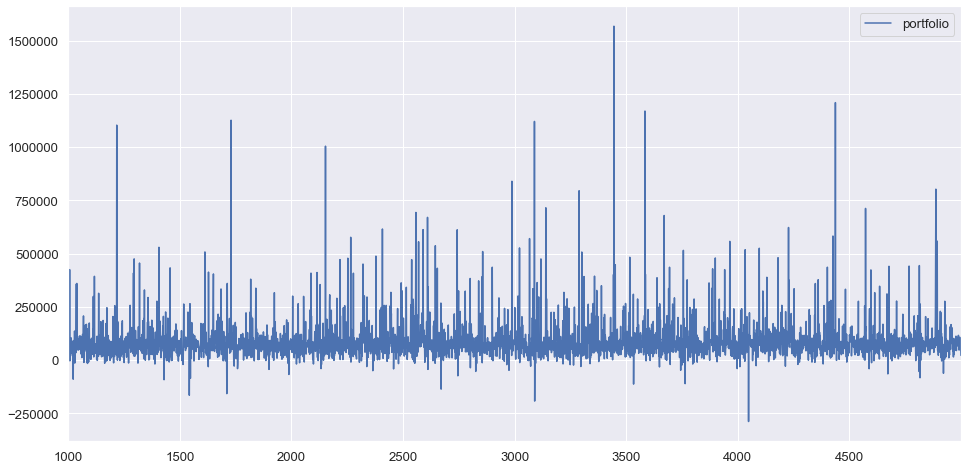

In [156]:
train_portfolio = [t[0] for t in pickle.load(open(portfolio_file + "-train.p", "rb"))]
train_portfolio_df = pd.DataFrame({"portfolio":train_portfolio})
train_portfolio_df[1000:].plot()
plt.show()

In [153]:
test_data = pickle.load(open(portfolio_file + "-test.p", "rb"))
test_portfolio = [t[0] for t in test_data]
test_portfolio_df = pd.DataFrame({"portfolio":test_portfolio})
test_portfolio_df.sort_values(by='portfolio', ascending=False, inplace=True)
test_portfolio_hist = pd.DataFrame({"protfolio_hist":test_data[test_portfolio_df.index.to_list()[0]][1]})
test_portfolio_df.describe()


,portfolio
count,100.000000
mean,27014.520000
std,7490.869021
min,13250.000000
25%,20935.750000
50%,26200.500000
75%,32254.250000
max,43861.000000


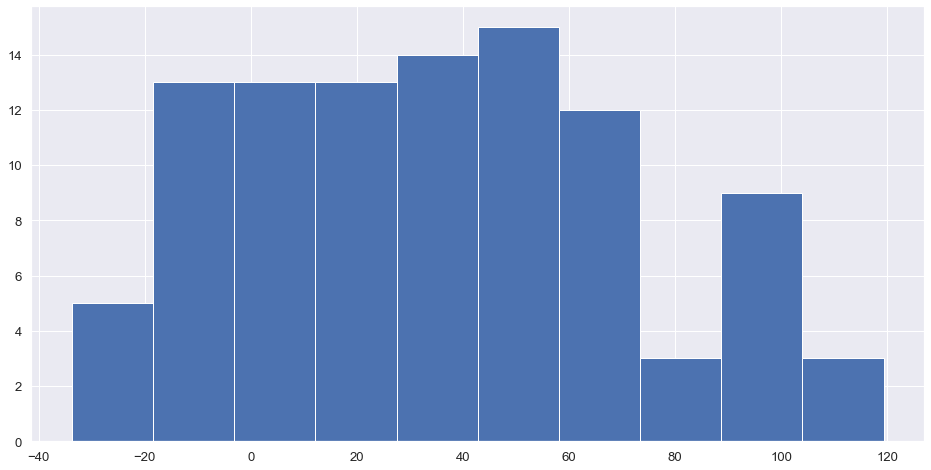

In [124]:
plt.hist((test_portfolio_df.portfolio - 20000)/200, bins=10)
plt.show()

In [111]:
def get_data(stock_intervals=20, col='Adj Close'):
    """
    Returns a 3 x n_step array
    """
    end_date = dt.date(2019, 12, 29)
    start_date = end_date - dt.timedelta(365 * stock_intervals)
    msft = pdr.get_data_yahoo('MSFT', start_date, end_date)
    ibm = pdr.get_data_yahoo('IBM', start_date, end_date)
    qcom = pdr.get_data_yahoo('QCOM', start_date, end_date)
    
    # recent price are at top; reverse it
    return np.array([msft[col].values,
                     ibm[col].values,
                     qcom[col].values])


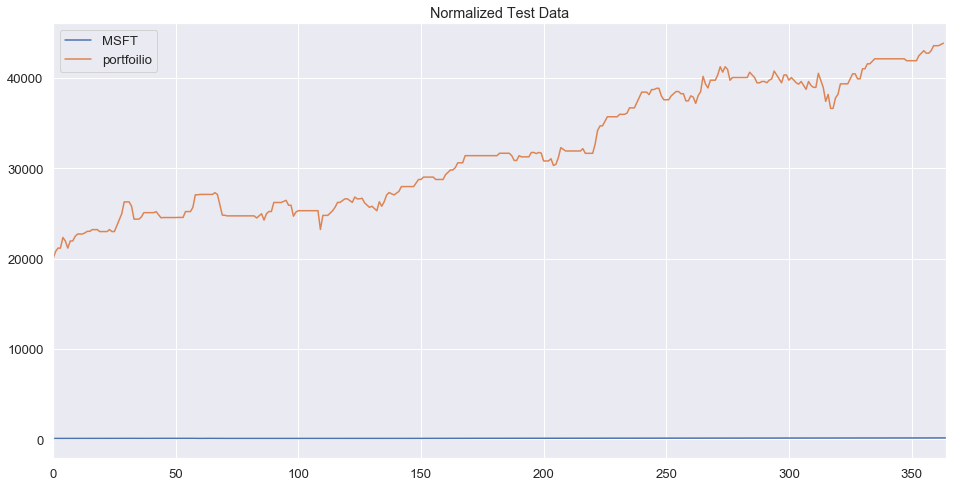

In [155]:
data = get_data()
test_data = data[:, -365:]
test_df = pd.DataFrame(np.transpose(test_data), columns=['MSFT', 'IBM', 'QCOM'])
test_df['portfoilio'] = test_portfolio_hist['protfolio_hist']
test_df_norm = test_df / test_df.iloc[0,:] - 1
test_df[['MSFT', 'portfoilio']].plot()
plt.title("Normalized Test Data")
plt.show()